<a href="https://colab.research.google.com/github/berbreik/algo_trade_MFI/blob/main/algo_trade_MFI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install quandl


In [3]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

In [4]:
from google.colab import files
files.upload()

Saving EOD-AAPL.csv to EOD-AAPL.csv


{'EOD-AAPL.csv': b'Date,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume\n2017-10-10,156.055,158.0,155.1,155.9,15617014.0,0.0,1.0,37.471386486828735,37.93841315509878,37.24207519212545,37.43416842329051,62468056.0\n2017-10-09,155.81,156.73,155.485,155.84,16262923.0,0.0,1.0,37.41255793478444,37.633465150624254,37.334520059623635,37.41976143095313,65051692.0\n2017-10-06,154.97,155.49,154.56,155.3,17407558.0,0.0,1.0,37.21086004206113,37.335720642318414,37.112412261089034,37.290098499916716,69630232.0\n2017-10-05,154.18,155.44,154.05,155.39,21283769.0,0.0,1.0,37.02116797628563,37.3237148153706,36.98995282622131,37.31170898842278,85135076.0\n2017-10-04,153.63,153.86,152.46,153.48,20163750.0,0.0,1.0,36.889103879859654,36.944330683819615,36.60816752928076,36.853086399016206,80655000.0\n2017-10-03,154.01,155.09,153.91,154.48,16230293.0,0.0,1.0,36.980348164663056,37.239674026735884,36.95633651076743,37.09320293797253,64921172.0\n2017-10-02,154.26,154.45,1

In [5]:
df=pd.read_csv('EOD-AAPL.csv')
df=df.set_index(pd.DatetimeIndex(df['Date'].values))
df



,Date,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
2017-10-10,2017-10-10,156.055,158.00,155.100,155.90,15617014.0,0.0,1.0,37.471386,37.938413,37.242075,37.434168,62468056.0
2017-10-09,2017-10-09,155.810,156.73,155.485,155.84,16262923.0,0.0,1.0,37.412558,37.633465,37.334520,37.419761,65051692.0
2017-10-06,2017-10-06,154.970,155.49,154.560,155.30,17407558.0,0.0,1.0,37.210860,37.335721,37.112412,37.290098,69630232.0
2017-10-05,2017-10-05,154.180,155.44,154.050,155.39,21283769.0,0.0,1.0,37.021168,37.323715,36.989953,37.311709,85135076.0
2017-10-04,2017-10-04,153.630,153.86,152.460,153.48,20163750.0,0.0,1.0,36.889104,36.944331,36.608168,36.853086,80655000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-09-15,2016-09-15,113.860,115.73,113.490,115.57,90613177.0,0.0,1.0,26.862607,27.303790,26.775314,27.266041,362452708.0
2016-09-14,2016-09-14,108.730,113.03,108.600,111.77,112340318.0,0.0,1.0,25.652303,26.666788,25.621633,26.369520,449361272.0
2016-09-13,2016-09-13,107.510,108.79,107.240,107.95,62176190.0,0.0,1.0,25.364473,25.666459,25.300772,25.468280,248704760.0
2016-09-12,2016-09-12,102.650,105.72,102.530,105.44,45292770.0,0.0,1.0,24.217869,24.942164,24.189558,24.876105,181171080.0


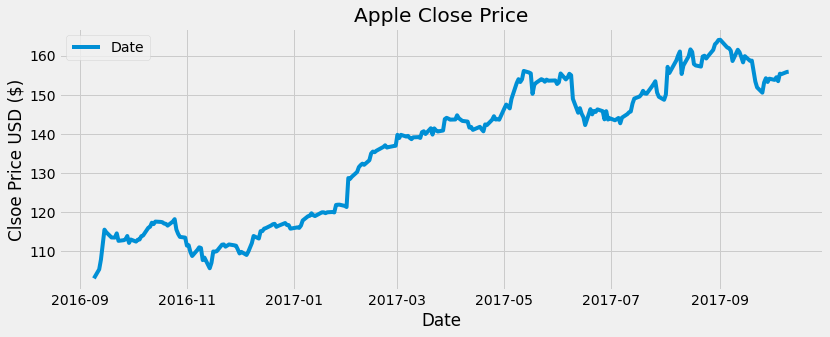

In [6]:
#show data
plt.figure(figsize=(12.2, 4.5))
plt.plot(df['Close'], label='Close Price')
plt.title('Apple Close Price')
plt.xlabel('Date')
plt.ylabel('Clsoe Price USD ($)')
plt.legend(df.columns.values, loc='upper left')
plt.show()

In [7]:
#calculate the price
tp=(df['Close']+df['High']+df['Low'])/3
tp


2017-10-10    156.333333
2017-10-09    156.018333
2017-10-06    155.116667
2017-10-05    154.960000
2017-10-04    153.266667
                 ...    
2016-09-15    114.930000
2016-09-14    111.133333
2016-09-13    107.993333
2016-09-12    104.563333
2016-09-09    103.993333
Length: 274, dtype: float64

In [8]:
#get the period
period= 14

In [9]:
mf=tp*df['Volume']
mf

2017-10-10    2.441460e+09
2017-10-09    2.537314e+09
2017-10-06    2.700202e+09
2017-10-05    3.298133e+09
2017-10-04    3.090431e+09
                  ...     
2016-09-15    1.041417e+10
2016-09-14    1.248475e+10
2016-09-13    6.714614e+09
2016-09-12    4.735963e+09
2016-09-09    4.841616e+09
Length: 274, dtype: float64

In [10]:
#get all of the + nad - mf
pf=[]
nf=[]

#loop throup tf
for i in range(1,len(tp)):
  if tp[i]>tp[i-1]:
    pf.append(mf[i-1])
    nf.append(0)
  elif tp[i]<tp[i-1]:
    nf.append(mf[i-1])
    pf.append(0)
  else:
    pf.append(0)
    nf.append(0)



In [12]:
#get all the p and n mf with in time period
pmf=[]
nmf=[]
for i in range(period-1,len(pf)):
  pmf.append(sum(pf[i+1-period : i+1]))
for i in range(period-1,len(nf)):
  nmf.append(sum(nf[i+1-period : i+1]))

In [13]:
#calcultate the moeny flow index
mfi=100*(np.array(pmf)/(np.array(pmf)+ np.array(nmf)))
mfi

array([53.69509045, 62.01504988, 66.54220113, 71.67515908, 66.94774751,
       67.26993378, 72.69824511, 65.07674832, 59.45082409, 60.01577517,
       64.47108676, 70.35340863, 69.66022483, 64.36635119, 57.85088348,
       49.33838063, 43.78356314, 37.75670213, 39.82997679, 39.29285129,
       30.59817292, 35.05063014, 43.1980574 , 42.95814534, 43.8832695 ,
       44.83468744, 36.37155276, 35.8590247 , 36.02302567, 45.68723417,
       46.14818789, 44.90765892, 45.37381416, 40.00639005, 46.24590508,
       41.0927568 , 34.43767902, 33.11161587, 31.22566419, 31.67150963,
       32.82306638, 33.15931625, 33.62370883, 30.91054657, 36.1936581 ,
       37.90322504, 43.29471118, 43.02624645, 36.21239909, 41.86263171,
       43.40550269, 36.93457194, 30.90197889, 21.16801831, 28.42374396,
       35.21763296, 40.90493542, 32.3244228 , 35.23135275, 35.19402511,
       36.47368292, 36.31320851, 34.66353416, 35.34115007, 42.36001062,
       41.68917485, 40.2621274 , 50.36009692, 51.42307558, 52.70

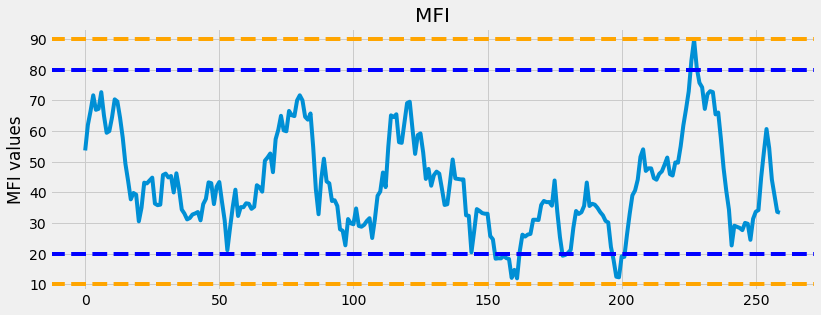

In [16]:
#visual show of mfi
df2 = pd.DataFrame()
df2['MFI']=mfi
#create the plot
plt.figure(figsize=(12.2, 4.5))
plt.plot(df2['MFI'], label='MFI')
plt.axhline(10, linestyle = '--', color='orange' )
plt.axhline(20, linestyle = '--', color='blue' )
plt.axhline(80, linestyle = '--', color='blue' )
plt.axhline(90, linestyle = '--', color='orange' )
plt.title('MFI')
plt.ylabel('MFI values')

plt.show()

In [17]:
#create a new data frame
new_df = pd.DataFrame()
new_df=df[period:]
new_df['MFI']= mfi


In [18]:
#show the new data frame
new_df

,Date,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,MFI
2017-09-20,2017-09-20,157.90,158.26,153.830,156.07,52951364.0,0.0,1.0,37.914402,38.000843,36.937127,37.474988,211805456.0,53.695090
2017-09-19,2017-09-19,159.51,159.77,158.440,158.73,20810632.0,0.0,1.0,38.300989,38.363419,38.044064,38.113698,83242528.0,62.015050
2017-09-18,2017-09-18,160.11,160.50,157.995,158.67,28269435.0,0.0,1.0,38.445059,38.538705,37.937213,38.099291,113077740.0,66.542201
2017-09-15,2017-09-15,158.47,160.97,158.000,159.88,49114602.0,0.0,1.0,38.051268,38.651559,37.938413,38.389832,196458408.0,71.675159
2017-09-14,2017-09-14,158.99,159.40,158.090,158.28,23760749.0,0.0,1.0,38.176129,38.274576,37.960024,38.005646,95042996.0,66.947748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-09-15,2016-09-15,113.86,115.73,113.490,115.57,90613177.0,0.0,1.0,26.862607,27.303790,26.775314,27.266041,362452708.0,54.487506
2016-09-14,2016-09-14,108.73,113.03,108.600,111.77,112340318.0,0.0,1.0,25.652303,26.666788,25.621633,26.369520,449361272.0,44.206842
2016-09-13,2016-09-13,107.51,108.79,107.240,107.95,62176190.0,0.0,1.0,25.364473,25.666459,25.300772,25.468280,248704760.0,38.838063
2016-09-12,2016-09-12,102.65,105.72,102.530,105.44,45292770.0,0.0,1.0,24.217869,24.942164,24.189558,24.876105,181171080.0,33.666193


In [21]:
#Create a function to get the buuy and sell signals
def get_signal(data,high,low):
  buy_signal=[]
  sell_signal=[]

  for i in range(len(data['MFI'])):
    if data['MFI'][i]> high:
      buy_signal.append(np.nan)
      sell_signal.append(data['Close'][i])
    elif data['MFI'][i]< low:
      buy_signal.append(data['Close'][i])
      sell_signal.append(np.nan)
    else:
      sell_signal.append(np.nan)
      buy_signal.append(np.nan)

  return(buy_signal,sell_signal)


In [22]:
#add new columns (buy & sell)
new_df['Buy'] = get_signal(new_df,80,20)[0]
new_df['Sell']= get_signal(new_df, 80,20)[1]
#show the data
new_df

,Date,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,MFI,Buy,Sell
2017-09-20,2017-09-20,157.90,158.26,153.830,156.07,52951364.0,0.0,1.0,37.914402,38.000843,36.937127,37.474988,211805456.0,53.695090,NaN,NaN
2017-09-19,2017-09-19,159.51,159.77,158.440,158.73,20810632.0,0.0,1.0,38.300989,38.363419,38.044064,38.113698,83242528.0,62.015050,NaN,NaN
2017-09-18,2017-09-18,160.11,160.50,157.995,158.67,28269435.0,0.0,1.0,38.445059,38.538705,37.937213,38.099291,113077740.0,66.542201,NaN,NaN
2017-09-15,2017-09-15,158.47,160.97,158.000,159.88,49114602.0,0.0,1.0,38.051268,38.651559,37.938413,38.389832,196458408.0,71.675159,NaN,NaN
2017-09-14,2017-09-14,158.99,159.40,158.090,158.28,23760749.0,0.0,1.0,38.176129,38.274576,37.960024,38.005646,95042996.0,66.947748,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-09-15,2016-09-15,113.86,115.73,113.490,115.57,90613177.0,0.0,1.0,26.862607,27.303790,26.775314,27.266041,362452708.0,54.487506,NaN,NaN
2016-09-14,2016-09-14,108.73,113.03,108.600,111.77,112340318.0,0.0,1.0,25.652303,26.666788,25.621633,26.369520,449361272.0,44.206842,NaN,NaN
2016-09-13,2016-09-13,107.51,108.79,107.240,107.95,62176190.0,0.0,1.0,25.364473,25.666459,25.300772,25.468280,248704760.0,38.838063,NaN,NaN
2016-09-12,2016-09-12,102.65,105.72,102.530,105.44,45292770.0,0.0,1.0,24.217869,24.942164,24.189558,24.876105,181171080.0,33.666193,NaN,NaN


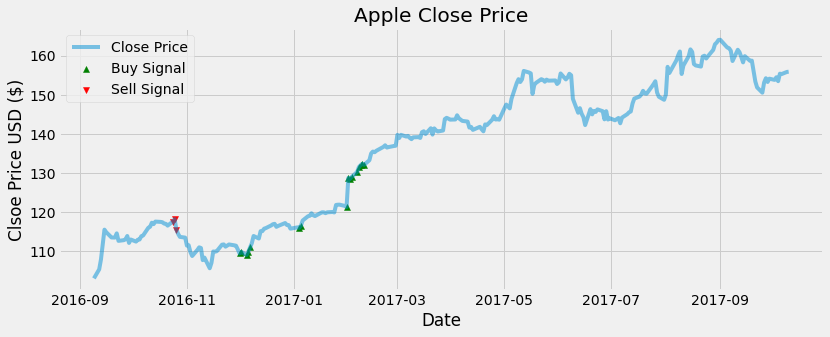

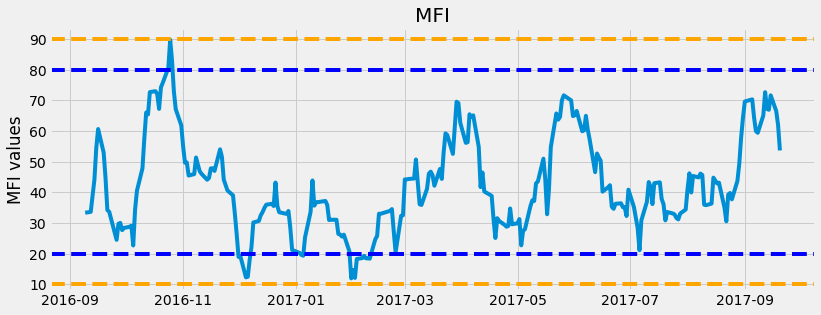

In [25]:
#plot the data
plt.figure(figsize=(12.2, 4.5))
plt.plot(df['Close'], label='Close Price' ,alpha=0.5)
plt.scatter(new_df.index, new_df['Buy'],color='green',label='Buy Signal', marker='^',alpha = 1)
plt.scatter(new_df.index, new_df['Sell'],color='red',label='Sell Signal', marker='v',alpha = 1)
plt.title('Apple Close Price')
plt.xlabel('Date')
plt.ylabel('Clsoe Price USD ($)')
plt.legend(loc='upper left')
plt.show()
plt.figure(figsize=(12.2, 4.5))
plt.plot(new_df['MFI'], label='MFI')
plt.axhline(10, linestyle = '--', color='orange' )
plt.axhline(20, linestyle = '--', color='blue' )
plt.axhline(80, linestyle = '--', color='blue' )
plt.axhline(90, linestyle = '--', color='orange' )
plt.title('MFI')
plt.ylabel('MFI values')

plt.show()